# PyTorch Workflow

Let's explore an example of PyTorch end-to-end workflow.

In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training )",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training )',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn  # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.12.1+cu102'

# 1. Data (preparing and loading)

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Image of any kind
* Videos (Youtube has a lot of data..)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical reperesentation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known **parameter**.

In [3]:
 # Create *known* parameter
weight = 0.7
bias = 0.3

#create 
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X),len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and testing set with our data.

In [5]:
# Create a train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test,y_test = X[train_split:], y[train_split:]


len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

How might we beter visualize our data?

This is where the data explore's motto comes in!

"Visualize, visualize, visualize"

In [6]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize = (10,7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label = "Training data")

    # Plot test data in green
    plt.scatter(test_data , test_labels, c="g", s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot the predicitons if they exists
        plt.scatter(test_data, predictions, c ="r", s=4, label = "Predicitons")

    # Show the legend
    plt.legend(prop={"size": 14});
    


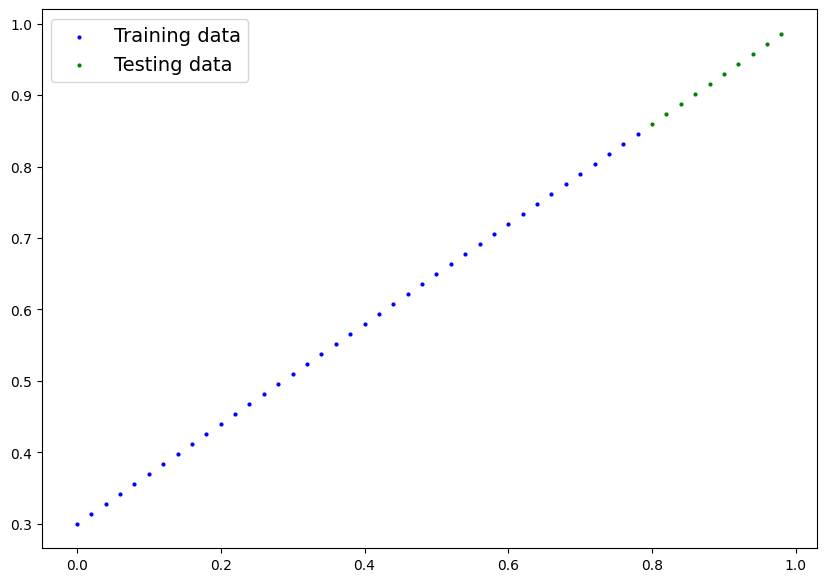

In [7]:
plot_predictions()

## 2. Build model

Our first PyTorch model!

This is very exciting... lets try

Because we are going to be building classes throught the course, I'd recomment getting familiar with OOP(Object oriented python) in python, to do so you can use the following resource from real python: https://realpython.com/python-classes/

What our model does:
* Start with random values ( weights and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values ( the weight & bias values we used to create the data ).

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [8]:
# Create a linear regression model class:
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch 
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad = True,
                                             dtype=torch.float))
        
        # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
            return self.weights * x+ self.bias # this is the linear regression formula
        

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent  
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

In [9]:
torch.randn(1)

tensor([-1.0438])

### Checking the contents of out PyTorch model

Now that we've created a model, let's see what's inside...

So we can check our model parameters or what's inside out model using `.parameters()`.

In [10]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()


# Check out the parameters of our model
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# List the named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

* Note - the premise of deep learning is to start with random values and make them more representative and closer to the ideal values.

In [12]:
weight, bias

(0.7, 0.3)

### Making pridictions using ` torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

when we pass data through our model, it is going to run it through the `forward()` method.

In [13]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [14]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [15]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# We can also use `torch.no_grad` to achieve the same thing, but `torch.inference_mode` is more readable and more prefered.
''' with torch.no_grad():
    y_preds = model_0(X_test) '''

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [16]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

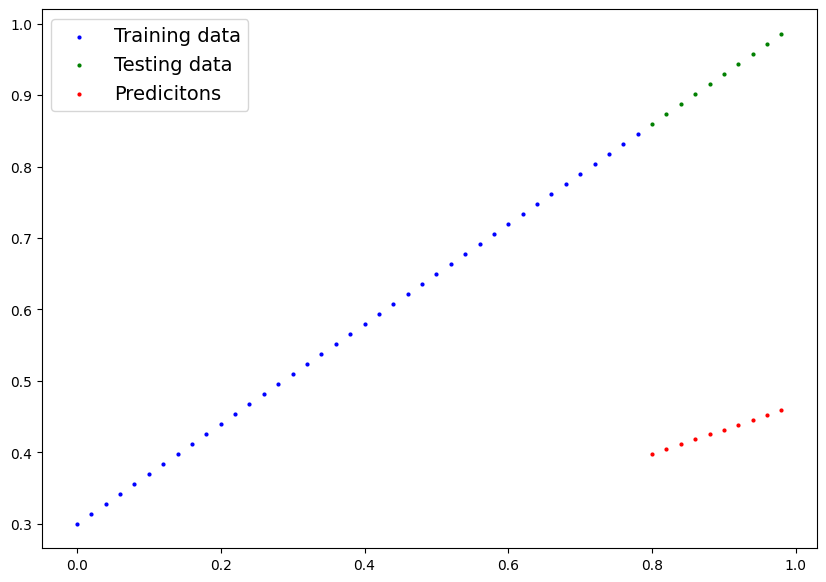

In [17]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameter (these may be random) to some known parameters.

Or in other words from a poor representation of data to a better representation of data.

One way to measure how poor or how wrong your models predicitons are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias)

And specifically in PyTorch, we need:
* A training loop
* A testing loop

In [18]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [19]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [20]:
# Setup a loss function
loss_fn = nn.L1Loss

# Setup an optimizer (stochastic gradient descent)
optimizer =  torch.optim.SGD(params = model_0.parameters(),
                             lr=0.01) # lr = learning rate = possibly the most important hyper parameter you can set

**Q:** Which loss function and optimizer should i use?

**A:** This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).

### Building a training loop ( and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss ( compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [21]:
# An epoch is one loop through the data...
epochs = 1

### Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradient to require gradient

    # 1. Forward pass
    y_pred = model_0(X_train) # predict on the training data

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train) # calculate the loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will accumulate (add on top of each other), so we have to zero them in step 3 (optimizer.zero_grad())
    

    ### Testing 
    model_0.eval() # turns off gradient tracking

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

### Encountered a`RuntimeError: Boolean value of Tensor with more than one value is ambiguous` when calculating the loss using `L1Loss`.

Issues and Solutions:

1. Mismatched Tensor Shapes:

* Check and ensure that the shapes of y_pred and y_train are compatible for the loss calculation.

2. NaN or Inf Values:

* Ensure that there are no NaN or Inf values in y_pred or y_train, as they can cause issues during the loss calculation.

3. Loss Function Parameters:

* Make sure that the loss function (L1Loss in this case) is being used correctly. Some loss functions have specific requirements for input shapes or parameters.

4. Ambiguity in Boolean Tensor:

* Explicitly set the reduction parameter when initializing the L1Loss function. The use of size_average has been deprecated, and using reduction is preferred.


In [27]:
# Check shapes
print("Shape of y_pred:", y_pred.shape)
print("Shape of y_train:", y_train.shape)

# Check for NaN or Inf
print("NaN in y_pred:", torch.isnan(y_pred).any())
print("Inf in y_pred:", torch.isinf(y_pred).any())
print("NaN in y_train:", torch.isnan(y_train).any())
print("Inf in y_train:", torch.isinf(y_train).any())

# Print values for debugging
print("y_pred:", y_pred)
print("y_train:", y_train)

Shape of y_pred: torch.Size([40, 1])
Shape of y_train: torch.Size([40, 1])
NaN in y_pred: tensor(False)
Inf in y_pred: tensor(False)
NaN in y_train: tensor(False)
Inf in y_train: tensor(False)
y_pred: tensor([[0.1288],
        [0.1355],
        [0.1423],
        [0.1490],
        [0.1557],
        [0.1625],
        [0.1692],
        [0.1759],
        [0.1827],
        [0.1894],
        [0.1961],
        [0.2029],
        [0.2096],
        [0.2163],
        [0.2231],
        [0.2298],
        [0.2366],
        [0.2433],
        [0.2500],
        [0.2568],
        [0.2635],
        [0.2702],
        [0.2770],
        [0.2837],
        [0.2904],
        [0.2972],
        [0.3039],
        [0.3106],
        [0.3174],
        [0.3241],
        [0.3308],
        [0.3376],
        [0.3443],
        [0.3510],
        [0.3578],
        [0.3645],
        [0.3712],
        [0.3780],
        [0.3847],
        [0.3914]], grad_fn=<AddBackward0>)
y_train: tensor([[0.3000],
        [0.3140],
        [

#### It appears that the issue is originating from the size_average and reduce parameters in the L1Loss initialization. The error is likely being triggered when these parameters are evaluated, and it's related to handling tensors with more than one value.

* To address this, you can explicitly set the values for size_average and reduce when initializing the L1Loss function. In PyTorch, size_average has been deprecated, and you can use reduction instead.

In [38]:
# Initialize L1Loss with reduction argument
loss_fn = torch.nn.L1Loss(reduction='mean')

# Calculate loss
loss = loss_fn(y_pred, y_train)

# Print loss as a scalar
print("Loss:", loss.item())

Loss: 0.31288138031959534


In [114]:
# An epoch is one loop through the data...
epochs = 1

### Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradient to require gradient

    # 1. Forward pass
    y_pred = model_0(X_train) # predict on the training data

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train) # calculate the loss
    print(f'Loss: {loss}')

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will accumulate (add on top of each other), so we have to zero them in step 3 (optimizer.zero_grad())
    

    ### Testing 
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout, batchnorm etc.)
    with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenecs
    with torch.no_grad(): # you may also see torch.no_grad in older PyTorch code
        #1. Do forward pass
        test_pred = model_0(X_test)

        #2. Calculate loss
        test_loss = loss_fn(test_pred, y_test)
         

    # Print out model state_dict()
    print(model_0.state_dict())

Loss: 0.03681822493672371
OrderedDict([('weights', tensor([0.5186])), ('bias', tensor([0.3763]))])


In [115]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

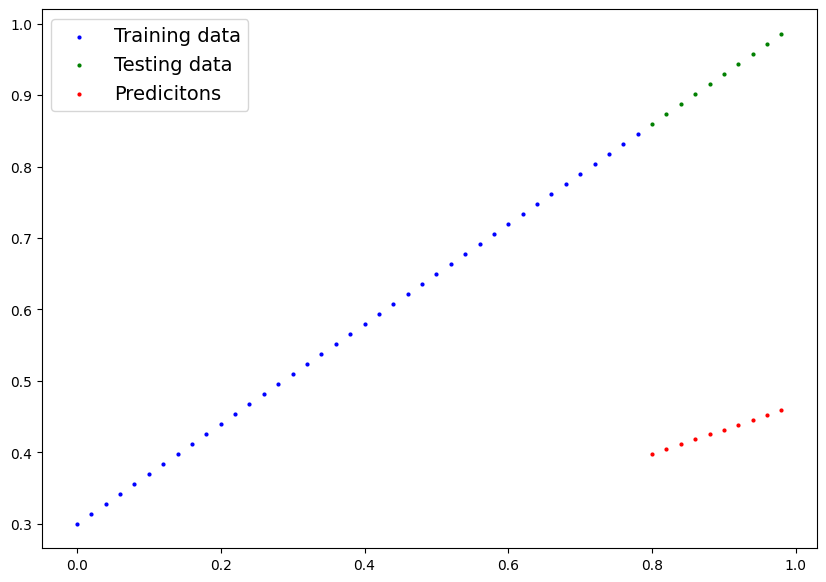

In [121]:
plot_predictions(predictions=y_preds)

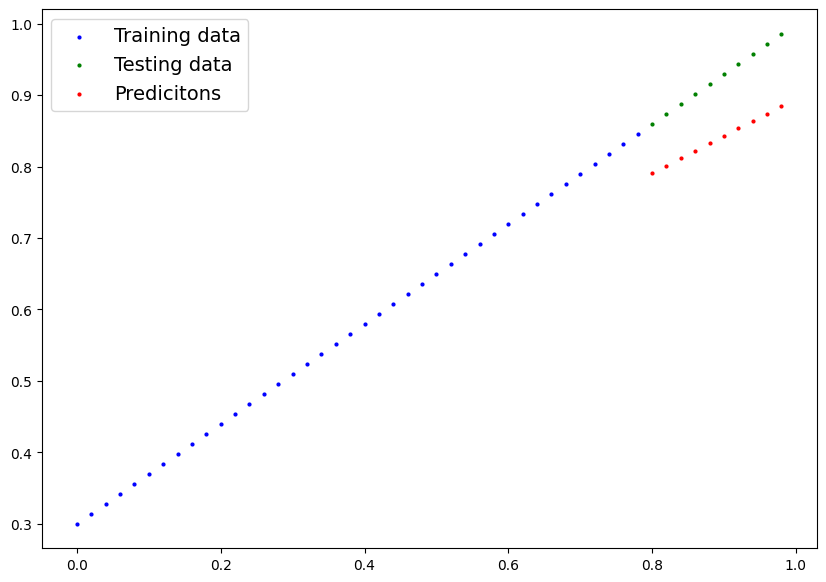

In [122]:
plot_predictions(predictions=y_preds_new)